In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [154]:
df = pd.read_csv('loans_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [155]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

### There are some NaN values, we will deal with them later

In [156]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


### We can get rid of duplicates, and also useless for us Loan Id

In [157]:
df = df.drop("Loan_ID", axis=1)
df = df.drop_duplicates()

### Let's check how the categorical data looks like

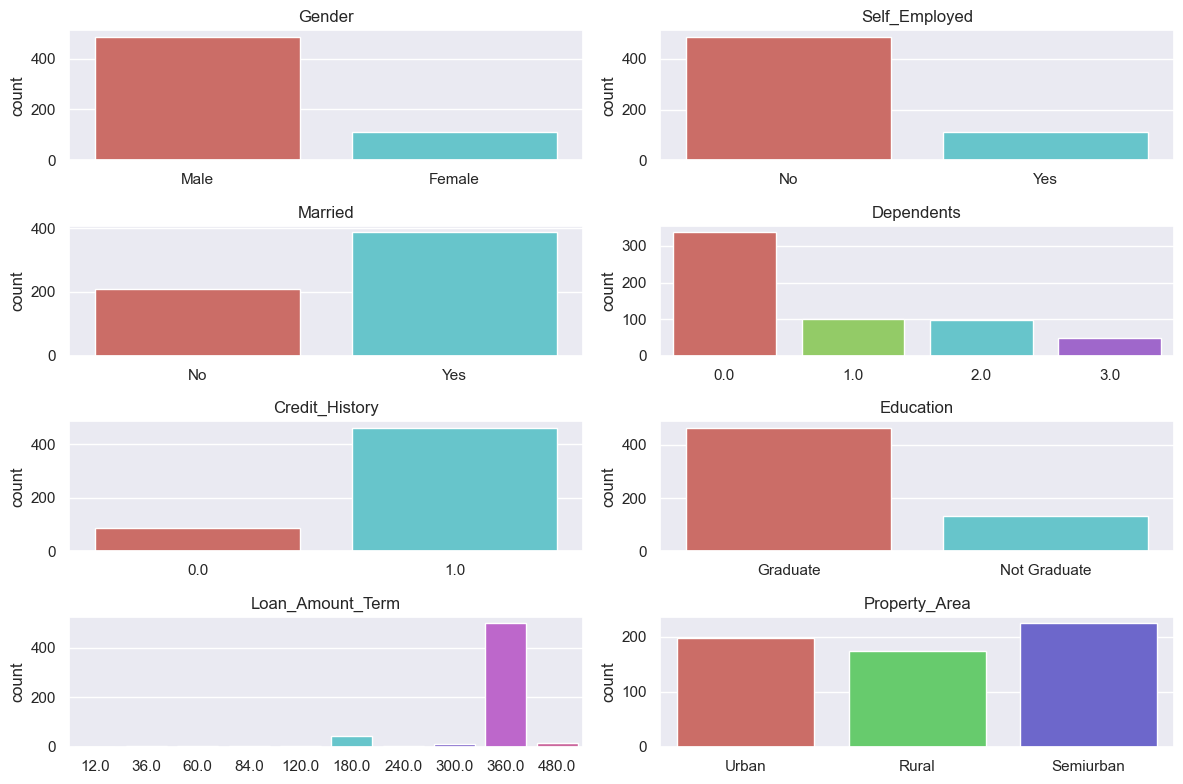

In [158]:
import seaborn as sns
sns.set(style="darkgrid")
fig, axes = plt.subplots(4, 2, figsize=(12, 8))
sns_plot1 = sns.countplot(x="Gender", data=df, palette="hls", ax=axes[0,0]).set(title='Gender')
sns_plot2 = sns.countplot(x="Married", data=df, palette="hls", ax=axes[1,0]).set(title='Married')
sns_plot3 = sns.countplot(x="Dependents", data=df, palette="hls", ax=axes[1,1]).set(title='Dependents')
sns_plot4 = sns.countplot(x="Education", data=df, palette="hls", ax=axes[2,1]).set(title='Education')
sns_plot5 = sns.countplot(x="Self_Employed", data=df, palette="hls", ax=axes[0,1]).set(title='Self_Employed')
sns_plot6 = sns.countplot(x="Credit_History", data=df, palette="hls", ax=axes[2,0]).set(title='Credit_History')
sns_plot7 = sns.countplot(x="Property_Area", data=df, palette="hls", ax=axes[3,1]).set(title='Property_Area')
sns_plot8 = sns.countplot(x="Loan_Amount_Term", data=df, palette="hls", ax=axes[3,0]).set(title='Loan_Amount_Term')
for ax in axes.flat:
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

### And what about the numerical data?

In [159]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Loan_Status')
Y = df['Loan_Status']


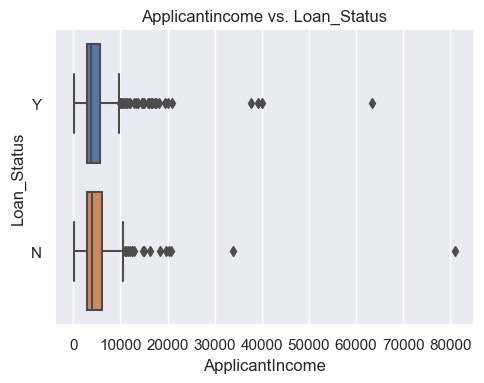

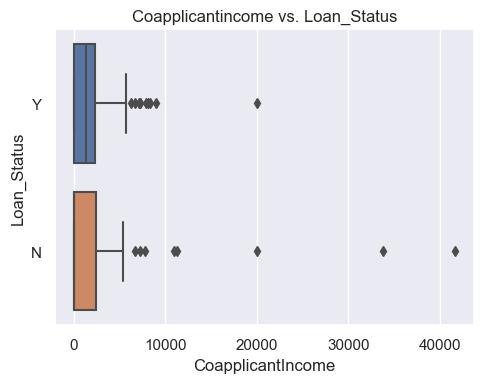

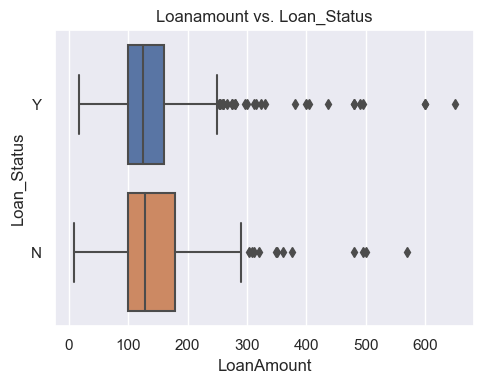

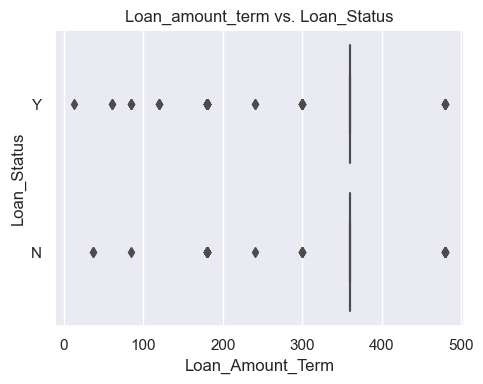

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box(X, Y, x):
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=X, x=x, y=Y)
    plt.title(f"{x.capitalize()} vs. Loan_Status")
    plt.tight_layout()
cont_feat = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
cat_feat = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']

for col in cont_feat:
    plot_box(X, Y, col)
plt.show()

### Dealing with missing values, cleaning the data

In [161]:
df.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
print("Before dropping all rows with 3 or more missing values",X.shape)
X.dropna(thresh=X.shape[1] - 2, inplace=True)
print("After dropping all rows with 3 or more missing values",X.shape)

Before dropping all rows with 3 or more missing values (598, 11)
After dropping all rows with 3 or more missing values (598, 11)


### So, no row has more than two missing values, thus we won't delete whole rows from our data

In [163]:
empty_collumns = ['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']
for column in empty_collumns:
    if column in cont_feat:
        mean_value = X[column].mean()
        X[column].fillna(mean_value, inplace=True)
    else:
        mode_value = X[column].mode()[0]
        X[column].fillna(mode_value, inplace=True)
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### One hot encoding (categorical variables into numerical, easier for computer to understand)

In [164]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [165]:
X = pd.get_dummies(X)

# Drop columns
X = X.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       }
       
X.rename(columns=new, inplace=True)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,144.968804,360.0,1.0,True,False,True,False,False,False,True
1,1.0,4583,1508.0,128.000000,360.0,1.0,True,True,True,False,True,False,False
2,0.0,3000,0.0,66.000000,360.0,1.0,True,True,True,True,False,False,True
3,0.0,2583,2358.0,120.000000,360.0,1.0,True,True,False,False,False,False,True
4,0.0,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,False,True


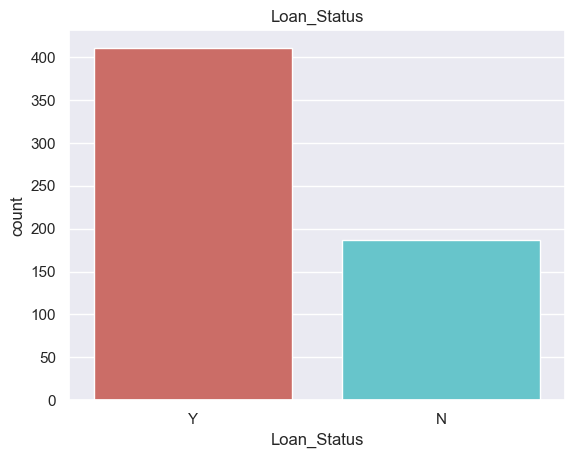

In [166]:
sns.countplot(x="Loan_Status", data=df, palette="hls").set(title='Loan_Status')
plt.show()

### Dividing into train, test and validation sets

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state = 12)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True, random_state = 12)

### Balancing the Train set (The predicted variable is not balanced)

Text(0.5, 1.0, 'Original Data')

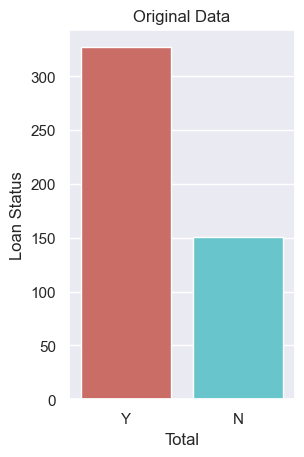

In [168]:


plt.subplot(1, 2, 1)
sns.countplot(x=y_train, data=X_train, palette='hls')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('Original Data')




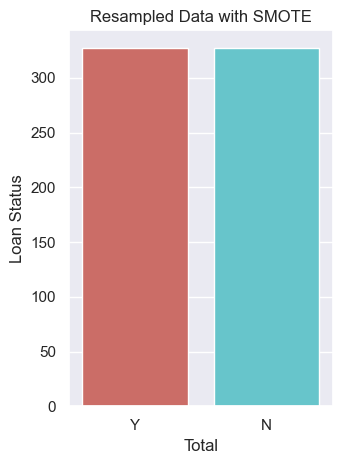

In [170]:
#%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Second figure
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
plt.subplot(1, 2, 2)
sns.countplot(x=y_train, data=X_train, palette='hls')
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.title('Resampled Data with SMOTE')

# Adjust the layout and display the figures
plt.tight_layout()
plt.show()